In [0]:
import io
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/AttilaDSA/IntilaqDSAcademy/master/Deep%20Learning%20Labs/Lab%20Logistic%20Regression/email.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [0]:
df=data.drop('Unnamed: 0', axis=1)

In [57]:
df.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,no,yes,no,no,no,no,no,no,no,no,11.370,202,HTML,no,no,no,0,big
1,0,no,yes,no,no,no,no,no,no,no,no,10.504,202,HTML,no,no,no,1,small
2,0,no,yes,no,no,no,no,yes,no,yes,no,7.773,192,HTML,no,no,no,6,small
3,0,no,yes,no,no,no,no,no,no,no,no,13.256,255,HTML,no,no,no,48,small
4,0,no,yes,no,no,no,no,no,no,no,yes,1.231,29,Plain,no,no,no,1,none


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 19 columns):
spam            3921 non-null int64
to_multiple     3921 non-null object
from            3921 non-null object
cc              3921 non-null object
sent_email      3921 non-null object
image           3921 non-null object
attach          3921 non-null object
dollar          3921 non-null object
winner          3921 non-null object
inherit         3921 non-null object
password        3921 non-null object
num_char        3921 non-null float64
line_breaks     3921 non-null int64
format          3921 non-null object
re_subj         3921 non-null object
exclaim_subj    3921 non-null object
urgent_subj     3921 non-null object
exclaim_mess    3921 non-null int64
number          3921 non-null object
dtypes: float64(1), int64(3), object(15)
memory usage: 582.1+ KB


In [0]:
df1=pd.get_dummies(df.number)

In [60]:
df1.head()

,big,none,small
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [0]:
df=df.join(df1)

In [62]:
df.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,...,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number,big,none,small
0,0,no,yes,no,no,no,no,no,no,no,...,202,HTML,no,no,no,0,big,1,0,0
1,0,no,yes,no,no,no,no,no,no,no,...,202,HTML,no,no,no,1,small,0,0,1
2,0,no,yes,no,no,no,no,yes,no,yes,...,192,HTML,no,no,no,6,small,0,0,1
3,0,no,yes,no,no,no,no,no,no,no,...,255,HTML,no,no,no,48,small,0,0,1
4,0,no,yes,no,no,no,no,no,no,no,...,29,Plain,no,no,no,1,none,0,1,0


In [0]:
df=df.drop('number', axis=1)

In [64]:
df.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,...,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,big,none,small
0,0,no,yes,no,no,no,no,no,no,no,...,11.370,202,HTML,no,no,no,0,1,0,0
1,0,no,yes,no,no,no,no,no,no,no,...,10.504,202,HTML,no,no,no,1,0,0,1
2,0,no,yes,no,no,no,no,yes,no,yes,...,7.773,192,HTML,no,no,no,6,0,0,1
3,0,no,yes,no,no,no,no,no,no,no,...,13.256,255,HTML,no,no,no,48,0,0,1
4,0,no,yes,no,no,no,no,no,no,no,...,1.231,29,Plain,no,no,no,1,0,1,0


In [0]:
df.to_multiple=df.to_multiple.replace({"yes":1,"no":0})
df.cc=df.cc.replace({"yes":1,"no":0})
df.sent_email=df.sent_email.replace({"yes":1,"no":0})
df.image=df.image.replace({"yes":1,"no":0})
df.attach=df.attach.replace({"yes":1,"no":0})
df.dollar=df.dollar.replace({"yes":1,"no":0})
df.winner=df.winner.replace({"yes":1,"no":0})
df.inherit=df.inherit.replace({"yes":1,"no":0})
df.password=df.password.replace({"yes":1,"no":0})
df.re_subj=df.re_subj.replace({"yes":1,"no":0})
df.exclaim_subj=df.exclaim_subj.replace({"yes":1,"no":0})
df.urgent_subj=df.urgent_subj.replace({"yes":1,"no":0})
df['from']=df['from'].replace({"yes":1,"no":0})
df.format=df.format.replace({"HTML":1,"Plain":0})

In [70]:
df.columns

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'inherit', 'password', 'num_char', 'line_breaks',
       'format', 're_subj', 'exclaim_subj', 'urgent_subj', 'exclaim_mess',
       'big', 'none', 'small'],
      dtype='object')

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(df)
df2= scaler.transform(df)

In [0]:
df2=pd.DataFrame(df2,columns=['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'image', 'attach',
       'dollar', 'winner', 'inherit', 'password', 'num_char', 'line_breaks',
       'format', 're_subj', 'exclaim_subj', 'urgent_subj', 'exclaim_mess',
       'big', 'none', 'small'])

In [73]:
df2.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,...,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,big,none,small
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059810,0.049988,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.055254,0.049988,1.0,0.0,0.0,0.0,0.000809,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.040887,0.047501,1.0,0.0,0.0,0.0,0.004854,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.069732,0.063168,1.0,0.0,0.0,0.0,0.038835,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.006471,0.006963,0.0,0.0,0.0,0.0,0.000809,0.0,1.0,0.0


In [0]:
from sklearn.model_selection import train_test_split
X = df2.drop('spam',axis=1)
y = df2['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [0]:
def plot_accuracy(history):
    plt.plot(history.history[ 'acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()

In [76]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, activation='relu',input_shape=(len(X_train.columns),)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Using TensorFlow backend.


In [77]:
history = model.fit(X_train,y_train,epochs=100,validation_split=0.1,verbose=1)

Train on 2469 samples, validate on 275 samples
Epoch 1/100
2469/2469 [==============================] - 0s 89us/step - loss: 0.3385 - acc: 0.9056 - val_loss: 0.2460 - val_acc: 0.9200
Epoch 2/100
2469/2469 [==============================] - 0s 36us/step - loss: 0.2794 - acc: 0.9056 - val_loss: 0.2233 - val_acc: 0.9200
Epoch 3/100
2469/2469 [==============================] - 0s 36us/step - loss: 0.2668 - acc: 0.9056 - val_loss: 0.2135 - val_acc: 0.9200
Epoch 4/100
2469/2469 [==============================] - 0s 37us/step - loss: 0.2569 - acc: 0.9056 - val_loss: 0.2077 - val_acc: 0.9200
Epoch 5/100
2469/2469 [==============================] - 0s 36us/step - loss: 0.2491 - acc: 0.9056 - val_loss: 0.2019 - val_acc: 0.9200
Epoch 6/100
2469/2469 [==============================] - 0s 39us/step - loss: 0.2428 - acc: 0.9056 - val_loss: 0.1973 - val_acc: 0.9200
Epoch 7/100
2469/2469 [==============================] - 0s 37us/step - loss: 0.2383 - acc: 0.9056 - val_loss: 0.1973 - val_acc: 0.9200
E

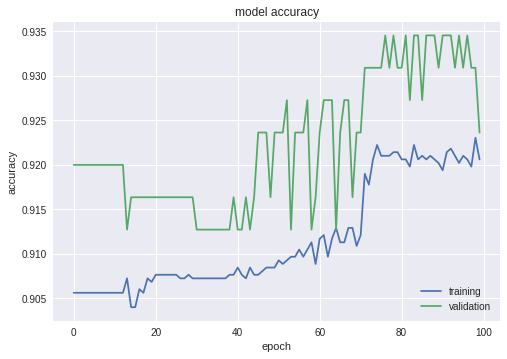

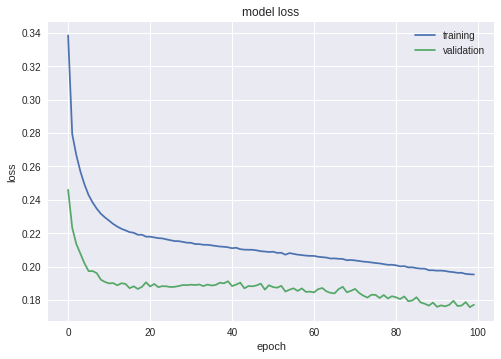

In [78]:
# summarize accuracy
plot_accuracy(history)

# summarize loss
plot_loss(history)

In [81]:
model.evaluate(X_test,y_test)

1177/1177 [==============================] - 0s 32us/step


[0.20591832955661424, 0.9133389978056351]